## Tweet extract

In [1]:
import requests
import os
import json

In [4]:
def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2FullArchiveSearchPython"
    return r


def connect_to_endpoint(url, params):
    response = requests.request("GET", search_url, auth=bearer_oauth, params=params)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()


def main():
    json_response = connect_to_endpoint(search_url, query_params)
    print(json.dumps(json_response, indent=4, sort_keys=True))




In [18]:

search_url = "https://api.twitter.com/2/tweets/search/all"
# Optional params: start_time,end_time,since_id,until_id,max_results,next_token,
# expansions,tweet.fields,media.fields,poll.fields,place.fields,user.fields
query_params = {'query': '(from:twitterdev -is:retweet) OR #twitterdev','tweet.fields': 'author_id'}
main()


401


Exception: (401, '{\n  "title": "Unauthorized",\n  "type": "about:blank",\n  "status": 401,\n  "detail": "Unauthorized"\n}')

## Notes Analysis

In [9]:
!pip install -q datasets transformers[sentencepiece] langid watermark

In [3]:
import requests
import os
import json
import pandas as pd

import time
from pathlib import Path

import langid


### Detection de langage

In [ ]:
url = 'https://ton.twimg.com/birdwatch-public-data/2023/11/27/notes/notes-00000.tsv'
r = requests.get(url, allow_redirects=True)
open('test.tsv', 'wb').write(r.content)
df = pd.read_csv('test.tsv', sep='\t')
df.head(5)


In [ ]:
!pip install fasttext

In [15]:
! wget -O model.bin https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin

--2023-11-28 14:09:30--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 99.86.91.116, 99.86.91.38, 99.86.91.40, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|99.86.91.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131266198 (125M) [application/octet-stream]
Saving to: ‘model.bin’

model.bin           100%[===================>] 125.18M  26.2MB/s    in 5.0s    

2023-11-28 14:09:36 (25.0 MB/s) - ‘model.bin’ saved [131266198/131266198]



In [8]:
import fasttext
class LanguageIdentification:

    def __init__(self):
        pretrained_lang_model = "model.bin"
        self.model = fasttext.load_model(pretrained_lang_model)

    def predict_lang(self, text):
        predictions = self.model.predict(text, k=2) # returns top 2 matching languages
        return predictions
    
    def is_fr(self,text):
        try:
            lang = self.predict_lang(text);
            return lang[0][0].split("_")[4]== 'fr';
        except:
            return False
        
LANGUAGE = LanguageIdentification()
LANGUAGE.is_fr("i love you")


False

### TODO 
- nltk
- nuages de mots

In [9]:
from tqdm import tqdm

In [10]:
select_fr = [LANGUAGE.is_fr(text) for text in tqdm(df.summary)]

100%|██████████| 357426/357426 [00:37<00:00, 9571.11it/s] 


In [20]:
sum(select_fr)/len(select_fr)*100

3.638795163194619

### 4 pourcent des notes en francais

In [40]:
notes_fr = df[select_fr]
notes_fr.head(5)
notes_fr_stat = notes_fr[notes_fr.summary.str.contains('statis|chif', na=False)]
notes_fr_stat

,noteId,noteAuthorParticipantId,createdAtMillis,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,...,misleadingUnverifiedClaimAsFact,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary,isMediaNote
973,1685422127413915648,119975E485131A6FEE2148B78761348261B6D062265CE0...,1690670923460,1683574362828337152,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,1,...,1,0,0,0,0,0,0,1,"Derrière un jargon pseudo scientifique, non so...",0
975,1690350861065539858,119975E485131A6FEE2148B78761348261B6D062265CE0...,1691846025132,1690103899611398144,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,Les chiffres repris sont effectivement officie...,0
5120,1700463461124235555,29E210DCD8E21D24F7343844D9B65370FDDC0EEAF5412B...,1694257056874,1700249609766158632,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,1,0,...,1,0,0,0,0,0,0,1,37 experts internationaux corrigent les chiffr...,0
5123,1708105624733561054,29E210DCD8E21D24F7343844D9B65370FDDC0EEAF5412B...,1696079090660,1708056376453353600,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,0,...,1,1,0,0,0,0,0,1,"le GIEC, « qui a publié des données sur l’impa...",0
8011,1689595823372296310,D6DCD6F4E67F377B1A48F38CB1DD26A811DD58DF544B06...,1691666010123,1689024081557958656,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,1,...,1,0,0,0,0,0,0,1,Le chiffrage de 48 000 morts est la fourchette...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355751,1712898402537578838,885746DFE3BB34258CD365F02B1A6FFC06E8958079885F...,1697221777933,1712759767146348828,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,1,...,0,0,0,0,0,0,0,1,35% des français déclarent ne plus faire trois...,0
355764,1722558334941679837,885746DFE3BB34258CD365F02B1A6FFC06E8958079885F...,1699524885294,1722554735943680507,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,Les chiffres donnés des victimes civiles ont p...,0
355767,1724358382444786109,885746DFE3BB34258CD365F02B1A6FFC06E8958079885F...,1699954050054,1724354053331722589,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,L'augmentation annoncée de 4000 expulsions ann...,1
355769,1724676482352455934,885746DFE3BB34258CD365F02B1A6FFC06E8958079885F...,1700029890989,1724471390839955734,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,1,...,0,0,0,0,0,0,0,1,Les chiffres connus des victimes civiles ont p...,1


In [46]:
notes_fr_stat.summary[973]

'Derrière un jargon pseudo scientifique, non sourcé et donc invérifiable, la personne remet totalement en question le vaccin contre le tétanos.   Pourtant les chiffres parlent d’eux mêmes lorsque l’on regarde avant et après l’introduction du vaccin.   https://fr.wikipedia.org/wiki/Vaccin_contre_le_t%C3%A9tanos'

In [55]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [130]:
def word_cloud(df, additional_stopwords = []):
    text = " ".join(text for text in df.summary)
    
    # Create stopword list:
    french_stopwords = set(['n','nnn','twitter','plu','fr','cette','html','tweet','ont','plus','quot','l','d','a','un','ne','à','une','www','http','https', 'com', 'http',
    'alors', 'au', 'aucuns', 'aussi', 'autre', 'avant', 'avec', 'avoir', 'bon', 'car', 'ce', 'cela', 'ces', 'ceux',
    'chaque', 'ci', 'comme', 'comment', 'dans', 'de','des', 'du', 'dedans', 'dehors', 'depuis', 'devrait', 'doit',
    'donc', 'dos', 'début', 'elle', 'elles', 'en', 'encore', 'essai', 'est', 'et', 'eu', 'fait', 'faites', 'fois',
    'font', 'hors', 'ici', 'il', 'ils', 'je', 'juste', 'la', 'le', 'les', 'leur', 'là', 'ma', 'maintenant', 'mais',
    'mes', 'mine', 'moins', 'mon', 'mot', 'même', 'ni', 'nommés', 'notre', 'nous', 'ou', 'où', 'par', 'parce',
    'pas', 'peut', 'peu', 'plupart', 'pour', 'pourquoi', 'quand', 'que', 'quel', 'quelle', 'quelles', 'quels',
    'qui', 'sa', 'sans', 'ses', 'seulement', 'si', 'sien', 'son', 'sont', 'sous', 'soyez', 'sujet', 'sur', 'ta',
    'tandis', 'tellement', 'tels', 'tes', 'ton', 'tous', 'tout', 'trop', 'très', 'tu', 'voient', 'vont', 'votre',
    'vous', 'vu', 'ça', 'étaient', 'état', 'étions', 'été', 'être'
])
    french_stopwords.update(additional_stopwords)

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=french_stopwords, background_color="white").generate(text)
    
    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Stop words base globale

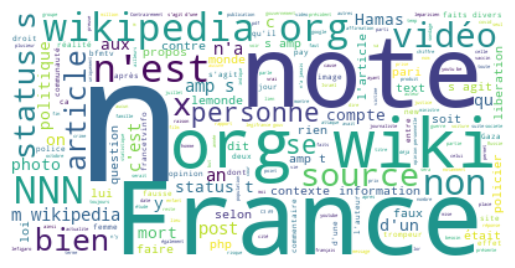

In [91]:
word_cloud(notes_fr)

## Stop words base stat

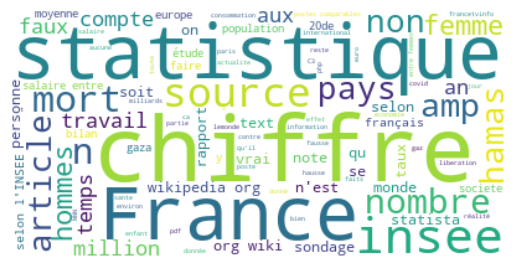

In [92]:
word_cloud(notes_fr_stat)

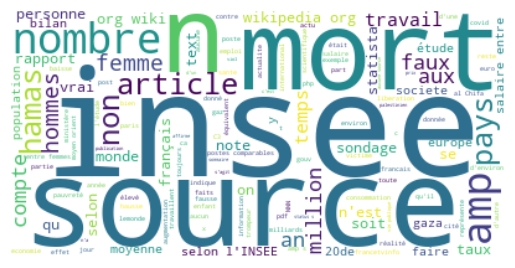

In [93]:
word_cloud(notes_fr_stat,["France","chiffre","chiffres","statistique","statistiques"])

###  Distinction  misleding, not misleading ?

In [96]:
notes_fr_stat.classification.value_counts()

classification
MISINFORMED_OR_POTENTIALLY_MISLEADING    361
NOT_MISLEADING                            46
Name: count, dtype: int64

Quels types de misleading ?

In [118]:
print(
"Other ", sum(notes_fr_stat.misleadingOther),"\n",
"factual error ",sum(notes_fr_stat.misleadingFactualError),"\n",
"Manipulate ",sum(notes_fr_stat.misleadingManipulatedMedia), "\n",
"Outdated ",sum(notes_fr_stat.misleadingOutdatedInformation), "\n"    ,
"Miss imp context ",sum(notes_fr_stat.misleadingMissingImportantContext), "\n"    ,
"unverified claim as fact ",sum(notes_fr_stat.misleadingUnverifiedClaimAsFact), "\n"    ,
"Satire",sum(notes_fr_stat.misleadingSatire), "\n"  
     )



Other  17 
 factual error  193 
 Manipulate  1 
 Outdated  86 
 Miss imp context  237 
 unverified claim as fact  134 
 Satire 9 



## Notes for not misleading

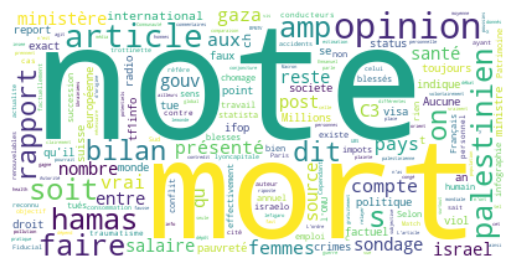

In [132]:
word_cloud( notes_fr_stat[notes_fr_stat.classification == "NOT_MISLEADING"],["France","chiffre","chiffres","statistique","statistiques"])  

### Notes for Misleading

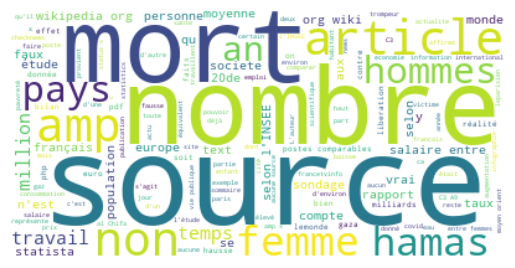

In [131]:
word_cloud( notes_fr_stat[notes_fr_stat.classification != "NOT_MISLEADING"],["France","chiffre","chiffres","statistique","statistiques"])  